# Imports

In [19]:
from mnist import MNIST
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import csv
import matplotlib.pyplot as plt

# Euclidean distance

In [14]:
def euclid(x1,y1,x2,y2):
    return pow(x2-x1,2)+pow(y2-y1,2)

# Feature extraction and preprocessing

In [15]:
def feature_list(ele):
    ls = list(mndata.display(ele))
    ls2 = []
    for item in ls:
        if item!='\n':
            ls2.append(item)
    ls2 = np.array(ls2).reshape(28,28)
    ls = [0]*784
    index = 0
    for i in range(28):
        for j in range(28):
            if ls2[i][j]=='@':
                ls[index] = euclid(i,j,14,14)
            index = index + 1
    return ls

# Data preprocessing and Cleaning

In [16]:
mndata = MNIST('samples')
images1, labels1 = mndata.load_training()
images2, labels2 = mndata.load_testing()
y_train = list(labels1)
y_test = list(labels2)
features = []
for item in range(10000):
    features.append(feature_list(images1[item]))
feature_df = pd.DataFrame(features)
features = []
for item in range(10000,20000):
    features.append(feature_list(images1[item]))
feature_df = feature_df.append(pd.DataFrame(features))
features = []
for item in range(20000,30000):
    features.append(feature_list(images1[item]))
feature_df = feature_df.append(pd.DataFrame(features))
features = []
for item in range(30000,40000):
    features.append(feature_list(images1[item]))
feature_df = feature_df.append(pd.DataFrame(features))
features = []
for item in range(40000,50000):
    features.append(feature_list(images1[item]))
feature_df = feature_df.append(pd.DataFrame(features))
features = []
for item in range(50000,60000):
    features.append(feature_list(images1[item]))
feature_df = feature_df.append(pd.DataFrame(features))
features = []
for item in images2:
    features.append(feature_list(item))
feature_df_test = pd.DataFrame(features)
print(mndata.display(images1[5000]))


............................
............................
............................
............................
............................
............................
............................
............................
.....@@@@@@@@@@@@...........
...@@@@@@@@@@@@@@@..........
..@@@...........@@@.........
.................@@@........
..................@@@.......
..................@@@.......
..................@@@.......
.............@@@@@@@@@......
...........@@@@@@@@@@.......
.........@@@@@@@..@@@.......
.......@@@@........@@.......
.......@..........@@@.......
..................@@........
..................@@........
................@@@.........
................@@@.........
................@@..........
...............@@...........
............................
............................


# Feature Explanation
### Uniqueness defined by relative positions of digit border w.r.t. center

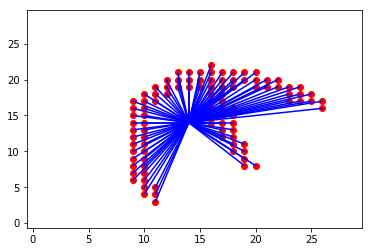

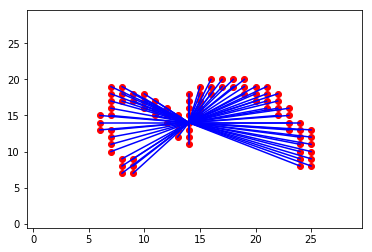

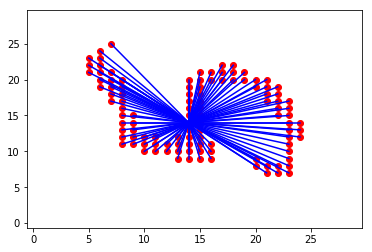

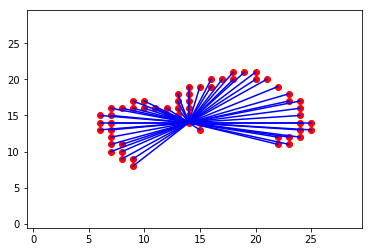

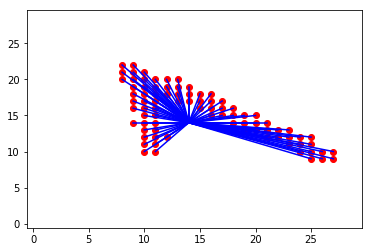

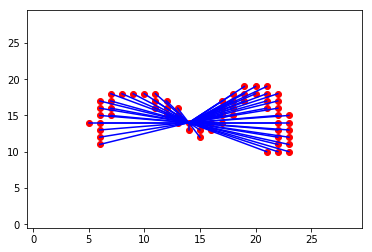

In [43]:
%matplotlib inline
for item in [5000,10000,20000,30000,40000,50000]:
    eg = list(mndata.display(images1[item]))
    eg = [ele for ele in eg if ele!='\n']
    w_x = []
    w_y = []
    b_x = []
    b_y = []
    for i in range(28):
        for j in range(28):
            if eg[(i*28)+j]=='.':
                w_x.append(i+1)
                w_y.append(j+1)
            else:
                b_x.append(i+1)
                b_y.append(j+1)
    for i,j in zip(b_x,b_y):
        x1, y1 = [i,14],[j,14]
        plt.plot(x1, y1,c='b')
    plt.scatter(w_y,w_x,c='w')
    plt.scatter(b_x,b_y,c='r')
    plt.show()

# K nearest neighbors

In [17]:
#max_i = -1
#score = 0
#for i in range(1,20):
#    clf = KNeighborsClassifier(n_neighbors=i).fit(feature_df,list(labels1))
#    temp = clf.score(feature_df_test,list(labels2))
#    if temp>score:
#        score = temp
#        max_i = i
#print("Accuracy-->"+str(score)+" N-->"+str(max_i))
'''
    Maximum test accuracy obtained at k=8 nearest neighbors 0.8376
'''

'\n    Maximum test accuracy obtained at k=8 nearest neighbors 0.8376\n'

In [18]:
clf = KNeighborsClassifier(n_neighbors=8).fit(feature_df,list(labels1))
print(clf.score(feature_df_test,list(labels2)))

0.8376
